In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
pd.set_option('display.float_format',"{:.2f}".format)

In [3]:
df = pd.read_csv('./stroke-data.csv')

## 기술통계

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [82]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


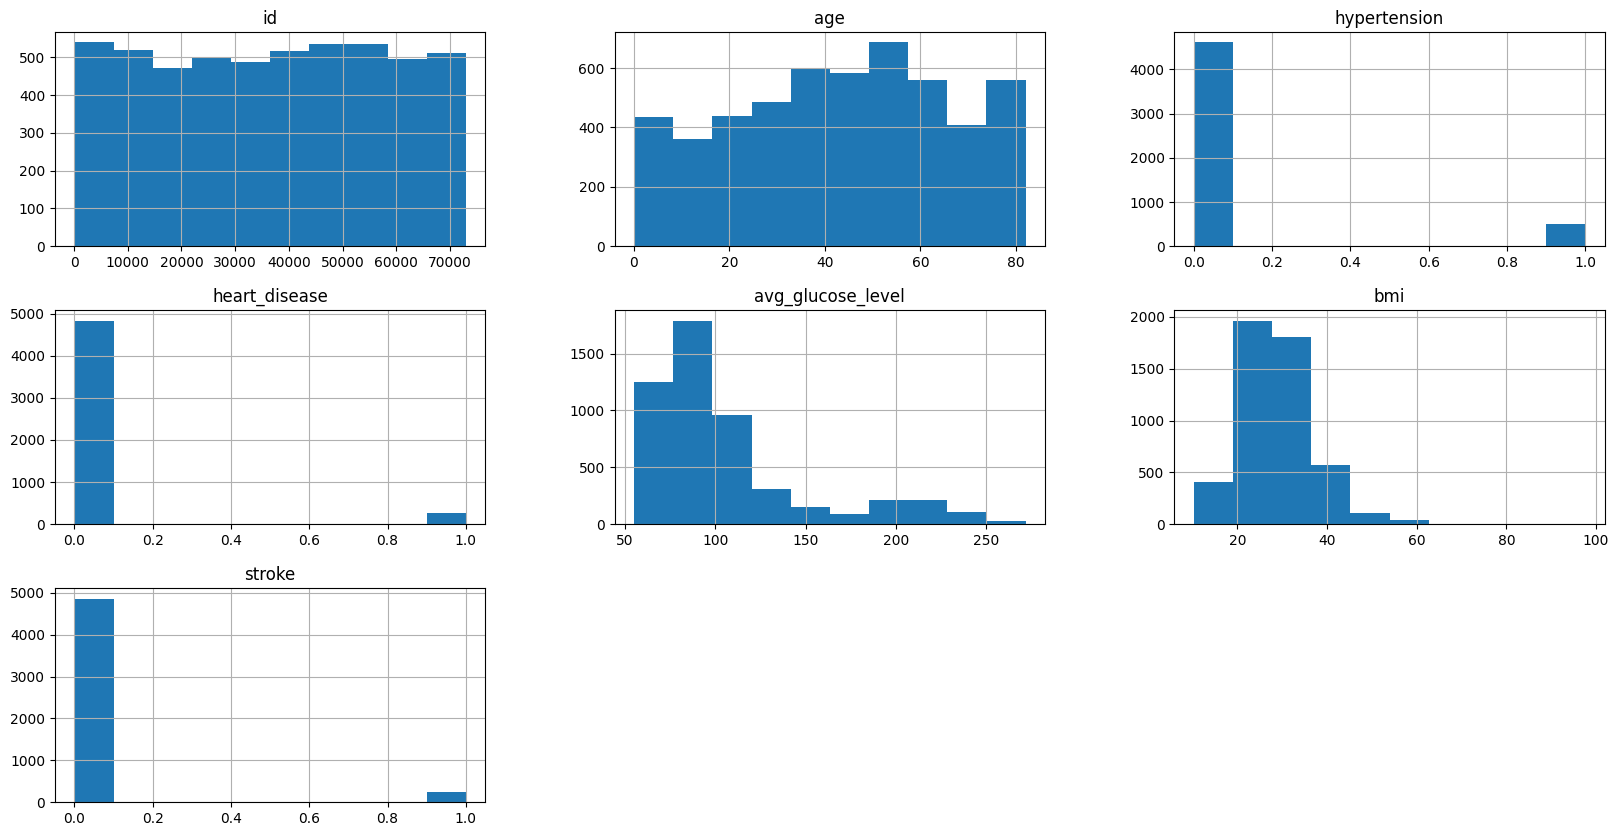

In [5]:
#한 번에 보고 싶다면 df.hist()
df.hist(figsize=(20,10))
plt.show()

(array([255., 179., 154., 208., 229., 211., 228., 256., 231., 366., 301.,
        282., 344., 342., 296., 263., 210., 197., 185., 373.]),
 array([8.0000e-02, 4.1760e+00, 8.2720e+00, 1.2368e+01, 1.6464e+01,
        2.0560e+01, 2.4656e+01, 2.8752e+01, 3.2848e+01, 3.6944e+01,
        4.1040e+01, 4.5136e+01, 4.9232e+01, 5.3328e+01, 5.7424e+01,
        6.1520e+01, 6.5616e+01, 6.9712e+01, 7.3808e+01, 7.7904e+01,
        8.2000e+01]),
 <BarContainer object of 20 artists>)

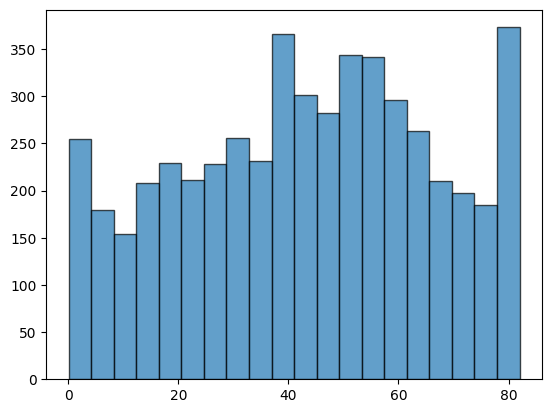

In [6]:
# 하나를 더 깊게 보고 싶다면 plt.hist()
# bins 수를 조절해서 구간을 더 쪼개서 확인할 수 있음
plt.hist(df['age'],alpha=0.7, edgecolor = 'black',bins=20)

In [7]:
#수치형 자료의 기술 통계를 한 번에 보고 싶을 때, df.describe()
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


In [8]:
#IQR 방식의 이상치 제거
bmi_data = df['bmi'].dropna().values
q_1 = np.percentile(bmi_data,q=25)
q_3 = np.percentile(bmi_data,q=75)
iqr = q_3 - q_1
q_1,q_3,iqr

(np.float64(23.5), np.float64(33.1), np.float64(9.600000000000001))

In [9]:
#bmi가 IQR 방식으로 이상치인 데이터 찾기 
lower_whisker = q_1 - 1.5 * iqr
upper_whisker = q_3 + 1.5 * iqr
df.loc[(df['bmi']<lower_whisker)|(df['bmi']>upper_whisker)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,13861,Female,52.00,1,0,Yes,Self-employed,Urban,233.29,48.90,never smoked,1
113,41069,Female,45.00,0,0,Yes,Private,Rural,224.10,56.60,never smoked,1
254,32257,Female,47.00,0,0,Yes,Private,Urban,210.95,50.10,Unknown,0
258,28674,Female,74.00,1,0,Yes,Self-employed,Urban,205.84,54.60,never smoked,0
270,72911,Female,57.00,1,0,Yes,Private,Rural,129.54,60.90,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4858,1696,Female,43.00,0,0,Yes,Private,Urban,100.88,47.60,smokes,0
4906,72696,Female,53.00,0,0,Yes,Private,Urban,70.51,54.10,never smoked,0
4952,16245,Male,51.00,1,0,Yes,Self-employed,Rural,211.83,56.60,never smoked,0
5009,40732,Female,50.00,0,0,Yes,Self-employed,Rural,126.85,49.50,formerly smoked,0


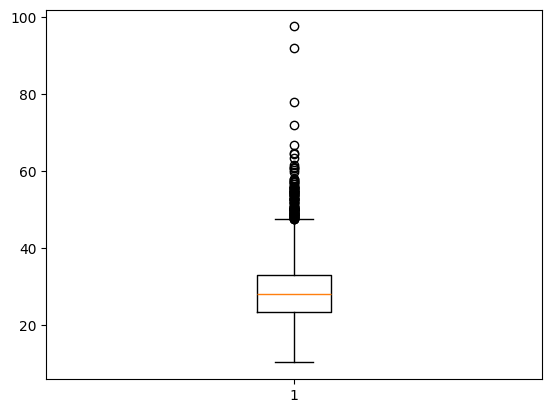

In [10]:
#일단 그려보기 
plt.boxplot(df['bmi'].dropna())
plt.show()

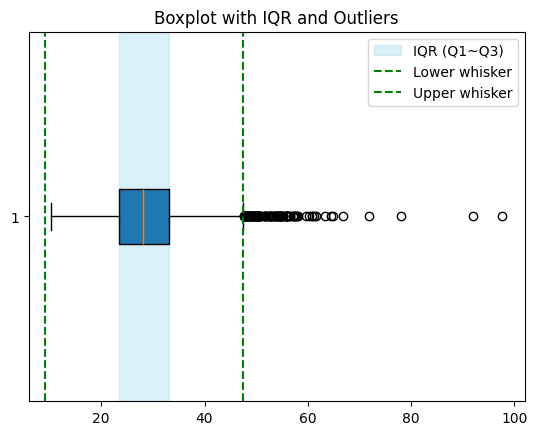

In [11]:
#그려보기 심화

plt.boxplot(bmi_data, vert=False,patch_artist=True, )

# IQR 영역 시각화
plt.axvspan(q_1, q_3, color='skyblue', alpha=0.3, label='IQR (Q1~Q3)')

# 수염 경계 표시
plt.axvline(lower_whisker, color='green', linestyle='--', label='Lower whisker')
plt.axvline(upper_whisker, color='green', linestyle='--', label='Upper whisker')

plt.title("Boxplot with IQR and Outliers")
plt.legend()
plt.show()


## 추론통계

In [17]:
# 표본 만들기 
sample_df = df.sample(200)

### 샘플데이터와 전체 데이터 비교하기

In [13]:
sample_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,200.00,200.00,200.00,200.00,200.00,192.00,200.00
mean,35650.07,42.43,0.10,0.03,111.79,29.44,0.03
std,21408.59,23.01,0.29,0.17,49.66,8.35,0.17
min,768.00,0.08,0.00,0.00,56.42,15.10,0.00
25%,16485.25,25.75,0.00,0.00,77.69,23.90,0.00
50%,34591.00,43.00,0.00,0.00,93.06,28.65,0.00
75%,54320.75,60.00,0.00,0.00,121.48,33.55,0.00
max,72824.00,82.00,1.00,1.00,263.56,78.00,1.00


In [14]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


### 실습1: 중심극한정리
-  중심극한정리란 쉽게 말해 표본평균은 정규분포를 따른다는 정리입니다.
- 중심극한정리에 따르면, 표본평균은 평균이 모집단의 평균( $\mu$) 이고 분산이 모집단의 분산/표본의 크기 ($\frac{\sigma^2}{n}$)인 정규분포를 따릅니다.

In [92]:
# 우선 bmi 데이터의 결측치 제거
df.dropna(subset='bmi',inplace=True)

In [93]:
# random_state : 랜덤으로 무언가를 할 때, random_state를 특정값으로 설정하면 항상 동일한 결과를 얻을 수 있어요.
sample_df = df.sample(n=30,random_state=1)
bmi_mean = sample_df['bmi'].mean()
bmi_mean

np.float64(30.030000000000005)

In [105]:
# 표본평균들을 리스트에 담아본다! 

sample_mean_lst = []

for i in range(10000):
    sample_df_i = df.sample(n=30,random_state=i)
    sample_mean_i = sample_df_i['bmi'].mean()
    sample_mean_lst.append(sample_mean_i)


In [106]:
sample_mean_lst

[np.float64(27.313333333333333),
 np.float64(30.030000000000005),
 np.float64(28.15333333333333),
 np.float64(30.496666666666666),
 np.float64(28.43),
 np.float64(30.286666666666672),
 np.float64(28.82333333333333),
 np.float64(29.05666666666667),
 np.float64(27.570000000000007),
 np.float64(29.259999999999998),
 np.float64(29.12333333333334),
 np.float64(29.153333333333343),
 np.float64(29.70333333333334),
 np.float64(27.763333333333332),
 np.float64(29.443333333333335),
 np.float64(28.016666666666662),
 np.float64(29.209999999999997),
 np.float64(26.88),
 np.float64(30.133333333333333),
 np.float64(28.62),
 np.float64(30.313333333333333),
 np.float64(24.639999999999997),
 np.float64(27.21666666666666),
 np.float64(30.533333333333335),
 np.float64(27.65666666666667),
 np.float64(29.416666666666664),
 np.float64(27.336666666666662),
 np.float64(27.330000000000002),
 np.float64(31.09666666666666),
 np.float64(30.669999999999998),
 np.float64(28.39666666666666),
 np.float64(28.57),
 np.f

(array([   2.,    8.,   32.,   75.,  214.,  429.,  722., 1088., 1291.,
        1470., 1384., 1157.,  877.,  601.,  309.,  182.,   89.,   49.,
          18.,    3.]),
 array([23.73      , 24.25466667, 24.77933333, 25.304     , 25.82866667,
        26.35333333, 26.878     , 27.40266667, 27.92733333, 28.452     ,
        28.97666667, 29.50133333, 30.026     , 30.55066667, 31.07533333,
        31.6       , 32.12466667, 32.64933333, 33.174     , 33.69866667,
        34.22333333]),
 <BarContainer object of 20 artists>)

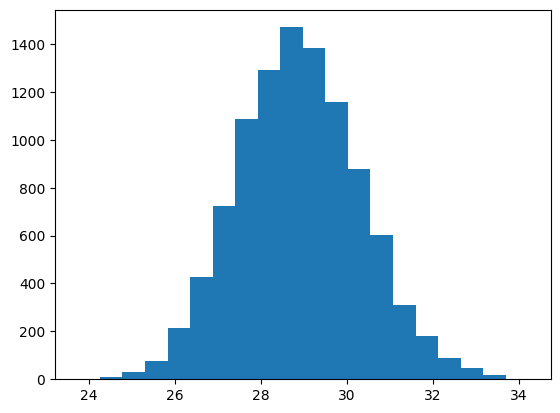

In [107]:
# 히스토그램으로 분포 시각화 - 종모양을 나타낸다 (정규분포!)
plt.hist(sample_mean_lst,bins=20)

In [ ]:
# 표본평균의 평균과 모집단의 평균이 거의 같다는 걸 알 수 있다. 
mean_of_sample_means = np.mean(sample_mean_lst)
mean_of_population = np.mean(df['bmi'])

mean_of_sample_means,mean_of_population

(np.float64(28.893367333333334), np.float64(28.893236911794663))

In [ ]:
# 표분평균의 분산과 모집단의 분산 비교하기

#1. 표본평균의 표준편차와 모집단의 표준편차를 구한다. 
standard_deviation_of_sample_means = np.std(sample_mean_lst)
standard_devation_of_population = np.std(df['bmi'])

#2. 표준편차를 제곱한다. 
variance_of_sample_means = np.power(standard_deviation_of_sample_means,2)
variance_of_population = np.power(standard_devation_of_population,2)

variance_of_sample_means, variance_of_population

(np.float64(2.048695258844), np.float64(61.67379822071127))

In [ ]:
#꽤 차이가 나네? 했다면, 주의하기! - 모집단의 분산을 표본의 크기로 나눠저야 한다. 
variance_of_sample_means, variance_of_population/30

(np.float64(2.048695258844), np.float64(2.055793274023709))